# Loading Data to Pandas Frame for Ananlysis and Preliminary Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('HR_Attrition.csv')
data.head()


,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


# Data Visualization with Seaborn and Matplotlib libraries

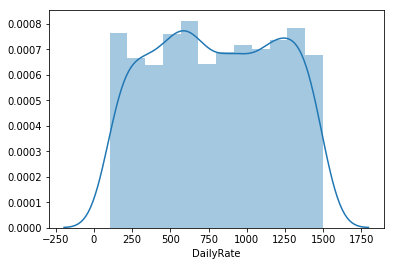

In [3]:
sns.distplot(data['DailyRate'],kde='false')

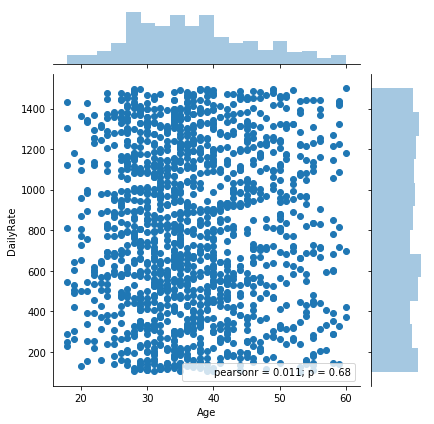

In [4]:
sns.jointplot('Age','DailyRate',data=data)

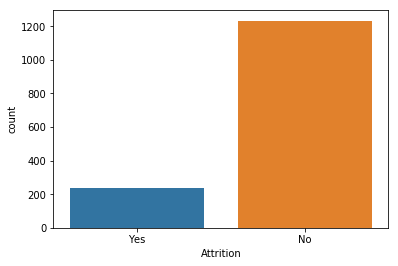

In [5]:

sns.countplot('Attrition',data=data)

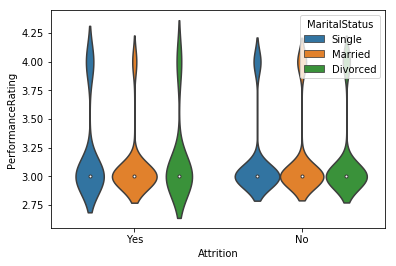

In [6]:
sns.violinplot('Attrition','PerformanceRating',hue='MaritalStatus',data=data)

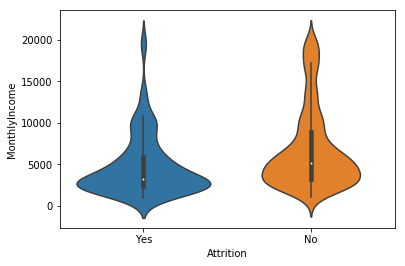

In [7]:
sns.violinplot('Attrition','MonthlyIncome',data=data,kind='bar')

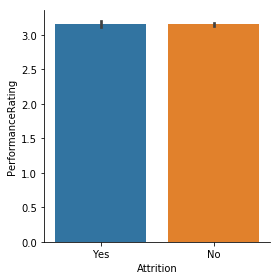

In [8]:
sns.factorplot('Attrition','PerformanceRating',data=data,kind='bar')

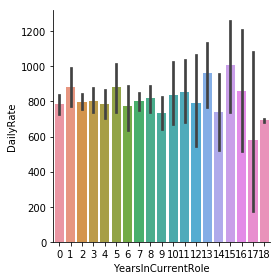

In [9]:
#display(data)
sns.factorplot('YearsInCurrentRole','DailyRate',data=data,kind='bar')

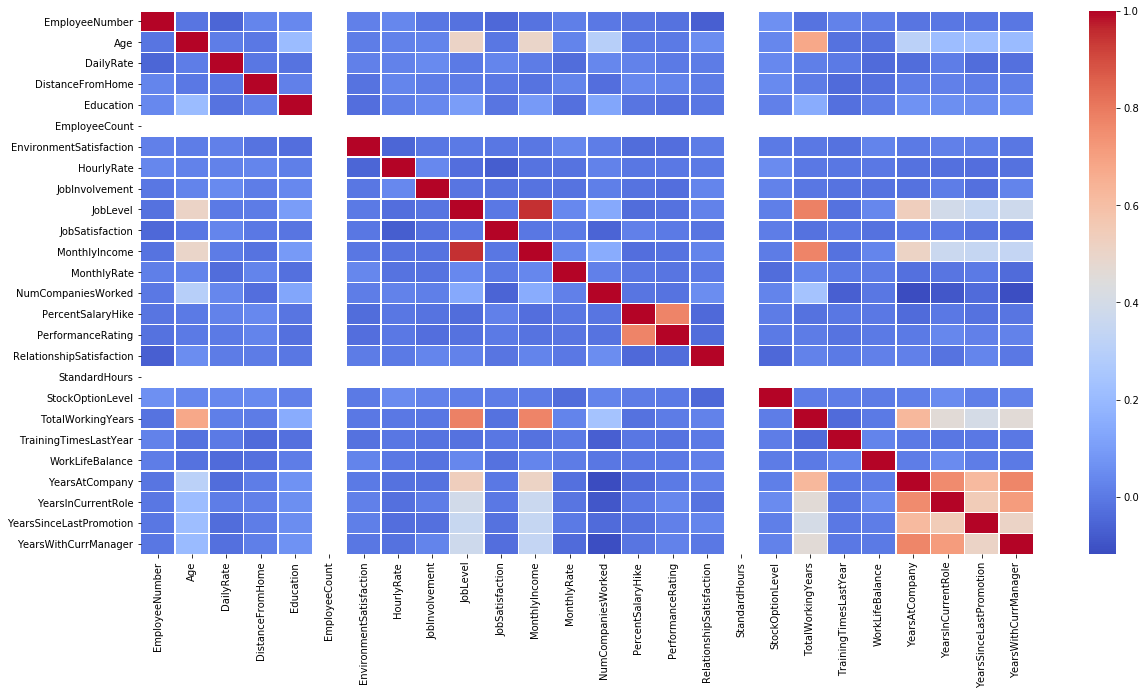

In [10]:
ec=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(ec,linecolor='white',linewidths=.5,cbar='true',cmap='coolwarm')

# Data Processing and Transformation

In [11]:
# Eliminate the non impact fetures (EmployeeCount and StandardHours)

data = data.drop('EmployeeCount', axis=1)
data = data.drop('StandardHours',axis=1)
data = data.drop('EmployeeNumber',axis=1)

# Apply manupulation for categorical attribute Attrition 1 for Yes and 0 for No
data['Attrition']=data['Attrition'].apply(lambda x:0 if x=='No' else 1)
attrition = data['Attrition']
data=data.drop('Attrition',axis=1)
data.head()                               
                                          

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome','MonthlyRate']

features_minmax_transform= pd.DataFrame(data = data)
features_minmax_transform[numerical] = scaler.fit_transform(features_minmax_transform[numerical])

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()

features_final = pd.get_dummies(features_minmax_transform)
print(features_final.head())

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,Travel_Rarely,0.715820,Sales,0.000000,2,Life Sciences,2,Female,0.914286,...,3,1,0,8,0,1,6,4,0,5
1,0.738095,Travel_Frequently,0.126700,Research & Development,0.250000,1,Life Sciences,3,Male,0.442857,...,4,4,1,10,3,3,10,7,1,7
2,0.452381,Travel_Rarely,0.909807,Research & Development,0.035714,2,Other,4,Male,0.885714,...,3,2,0,7,3,3,0,0,0,0
3,0.357143,Travel_Frequently,0.923407,Research & Development,0.071429,4,Life Sciences,4,Female,0.371429,...,3,3,0,8,3,3,8,7,3,0
4,0.214286,Travel_Rarely,0.350036,Research & Development,0.035714,1,Medical,1,Male,0.142857,...,3,4,1,6,3,3,2,2,2,2


        Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.547619   0.715820          0.000000          2                        2   
1  0.738095   0.126700          0.250000          1                        3   
2  0.452381   0.909807          0.035714          2                        4   
3  0.357143   0.923407          0.071429          4                        4   
4  0.214286   0.350036          0.035714          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0    0.914286               3         2                4       0.262454   
1    0.442857               2         2                2       0.217009   
2    0.885714               2         1                3       0.056925   
3    0.371429               3         1                3       0.100053   
4    0.142857               3         1                2       0.129489   

       ...       JobRole_Research Director  JobRole_Research Scienti

# Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [13]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    attrition, 
                                                    test_size = 0.2, 
                                                    random_state = 10)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))



Training set has 1176 samples.
Testing set has 294 samples.


C:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feed Dataset to Model and Evaluate Metrics

In [14]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# TODO: Initialize the three models
clf_A = GaussianNB(priors=None)
clf_B = DecisionTreeClassifier(random_state=10)
clf_C = SVC(random_state=10)
clf_D = RandomForestClassifier(min_samples_split=4,n_estimators=30,max_depth=10,n_jobs=2,random_state=10)
#clf_D = RandomForestClassifier(random_state=10)

Clist=['GaussianNB','DecisionTreeClassifier','SVC','RandomForestClassifier']
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.1)
i=0
for clf in [clf_A, clf_B, clf_C, clf_D]:
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    print("Model {}".format(Clist[i])) 
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))  
    print("Model Confusion Matrix on testing data: {}".format(confusion_matrix(np.asarray(y_test),np.asarray(predictions)))) 
    i+=1


Model GaussianNB
Accuracy score on testing data: 0.7381
Model Confusion Matrix on testing data: [[175  64]
 [ 13  42]]
Model DecisionTreeClassifier
Accuracy score on testing data: 0.7993
Model Confusion Matrix on testing data: [[206  33]
 [ 26  29]]
Model SVC
Accuracy score on testing data: 0.8299
Model Confusion Matrix on testing data: [[237   2]
 [ 48   7]]
Model RandomForestClassifier
Accuracy score on testing data: 0.8605
Model Confusion Matrix on testing data: [[237   2]
 [ 39  16]]


# Feature Relevance Observation:

scikit-learn classifier (e.g., adaboost, random forests) that has a feature_importance_ attribute, <br>
which is a function that ranks the importance of features according to the chosen classifier.
    


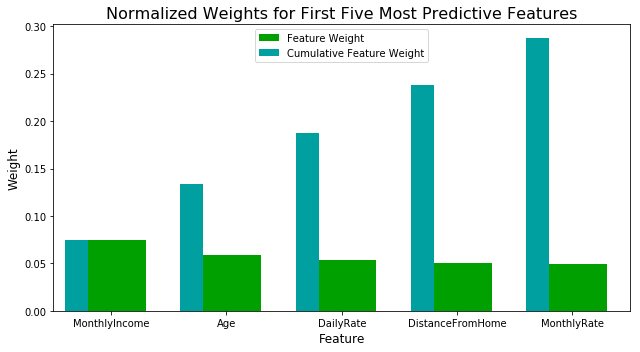

In [15]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
import visuals as vs

model = RandomForestClassifier(min_samples_split=4,n_estimators=30,max_depth=10,n_jobs=2,random_state=10)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.fit(X_train,y_train).feature_importances_
#print(importances)

# Plot
vs.feature_plot(importances, X_train, y_train)

# Final Model Metrics

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions)*100)
print(confusion_matrix(np.array(y_test),np.array(predictions)))
print(classification_report(y_test,predictions))

86.05442176870748
[[237   2]
 [ 39  16]]
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       239
          1       0.89      0.29      0.44        55

avg / total       0.86      0.86      0.83       294

